In [2]:
import pandas as pd

# Load CSV files
azure = pd.read_csv("../data/raw/azure_usage.csv")
external = pd.read_csv("../data/raw/external_factors.csv")

# Show first few rows
print("Azure Usage Data:")
display(azure.head())

print("External Factors Data:")
display(external.head())


Azure Usage Data:


,date,region,resource_type,usage_cpu,usage_storage,users_active
0,2023-01-01,East US,VM,88,1959,470
1,2023-01-01,East US,Storage,92,1595,388
2,2023-01-01,East US,Container,70,621,414
3,2023-01-01,West US,VM,60,1982,287
4,2023-01-01,West US,Storage,85,1371,351


External Factors Data:


,date,economic_index,cloud_market_demand,holiday
0,2023-01-01,104.97,0.99,1
1,2023-01-02,106.48,1.15,0
2,2023-01-03,97.66,0.98,0
3,2023-01-04,115.79,1.08,0
4,2023-01-05,95.31,1.05,0


In [3]:
# Shape of the datasets
print("Azure Usage shape:", azure.shape)
print("External Factors shape:", external.shape)

# Column names
print("\nAzure Usage Columns:", azure.columns.tolist())
print("External Factors Columns:", external.columns.tolist())

# Check for missing values
print("\nMissing values in Azure:")
print(azure.isnull().sum())

print("\nMissing values in External:")
print(external.isnull().sum())

# Summary statistics
print("\nAzure Usage Statistics:")
display(azure.describe())

print("\nExternal Factors Statistics:")
display(external.describe())


Azure Usage shape: (1080, 6)
External Factors shape: (90, 4)

Azure Usage Columns: ['date', 'region', 'resource_type', 'usage_cpu', 'usage_storage', 'users_active']
External Factors Columns: ['date', 'economic_index', 'cloud_market_demand', 'holiday']

Missing values in Azure:
date             0
region           0
resource_type    0
usage_cpu        0
usage_storage    0
users_active     0
dtype: int64

Missing values in External:
date                   0
economic_index         0
cloud_market_demand    0
holiday                0
dtype: int64

Azure Usage Statistics:


,usage_cpu,usage_storage,users_active
count,1080.000000,1080.000000,1080.000000
mean,74.651852,1242.477778,352.694444
std,14.549621,432.444284,86.280150
min,50.000000,500.000000,200.000000
25%,62.000000,881.750000,283.000000
50%,75.000000,1262.000000,353.000000
75%,87.000000,1609.000000,427.000000
max,99.000000,1995.000000,499.000000



External Factors Statistics:


,economic_index,cloud_market_demand,holiday
count,90.000000,90.000000,90.000000
mean,98.930444,1.006667,0.277778
std,8.825072,0.101517,0.450412
min,73.800000,0.800000,0.000000
25%,93.035000,0.940000,0.000000
50%,99.645000,1.015000,0.000000
75%,103.567500,1.077500,1.000000
max,118.860000,1.270000,1.000000


In [4]:
# Convert 'date' columns to datetime
azure['date'] = pd.to_datetime(azure['date'])
external['date'] = pd.to_datetime(external['date'])

# Merge datasets on 'date'
merged = pd.merge(azure, external, on='date', how='left')

# Check the merged dataset
print("Merged shape:", merged.shape)
print("\nColumns in merged dataset:", merged.columns.tolist())

# Show first few rows
merged.head()


Merged shape: (1080, 9)

Columns in merged dataset: ['date', 'region', 'resource_type', 'usage_cpu', 'usage_storage', 'users_active', 'economic_index', 'cloud_market_demand', 'holiday']


,date,region,resource_type,usage_cpu,usage_storage,users_active,economic_index,cloud_market_demand,holiday
0,2023-01-01,East US,VM,88,1959,470,104.97,0.99,1
1,2023-01-01,East US,Storage,92,1595,388,104.97,0.99,1
2,2023-01-01,East US,Container,70,621,414,104.97,0.99,1
3,2023-01-01,West US,VM,60,1982,287,104.97,0.99,1
4,2023-01-01,West US,Storage,85,1371,351,104.97,0.99,1


Matplotlib is building the font cache; this may take a moment.


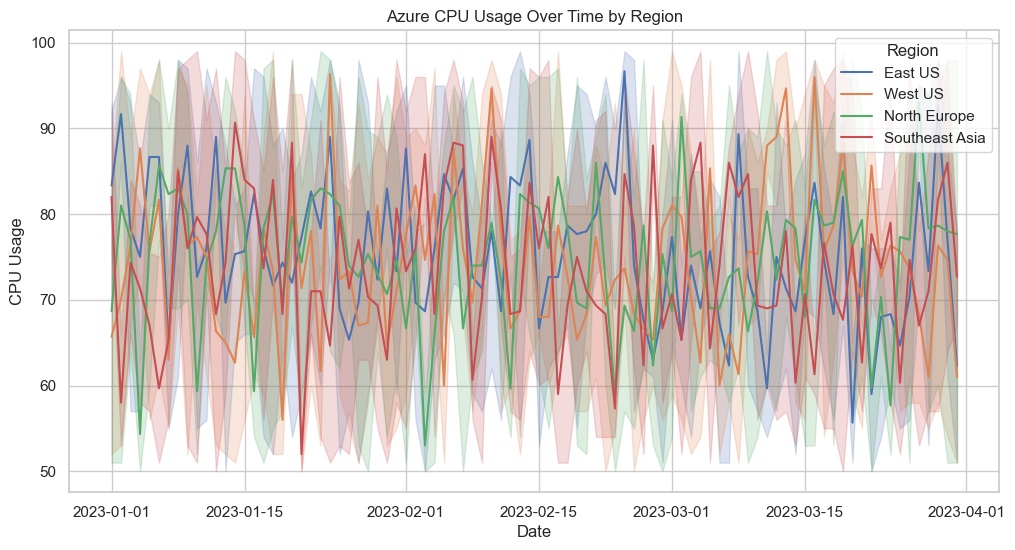

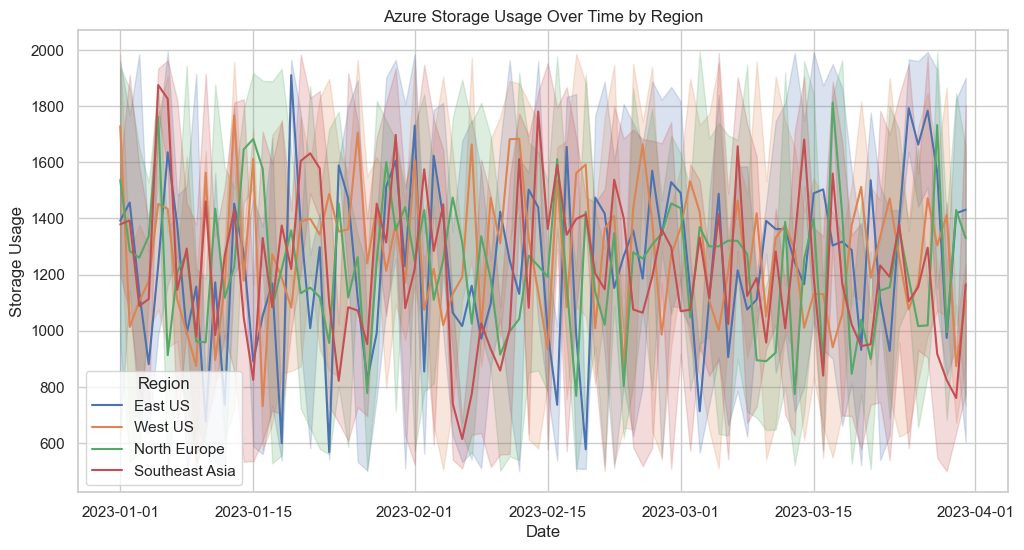

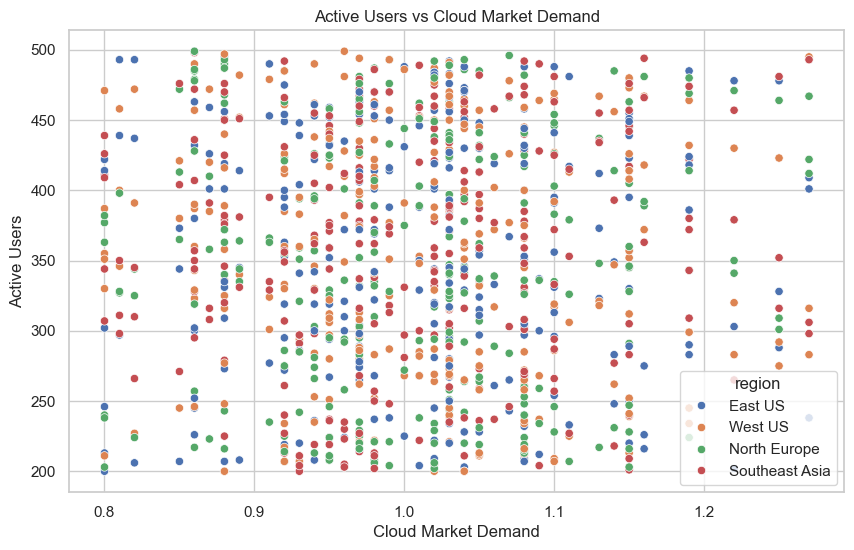

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. CPU usage over time
plt.figure(figsize=(12,6))
sns.lineplot(data=merged, x="date", y="usage_cpu", hue="region")
plt.title("Azure CPU Usage Over Time by Region")
plt.xlabel("Date")
plt.ylabel("CPU Usage")
plt.legend(title="Region")
plt.show()

# 2. Storage usage trend
plt.figure(figsize=(12,6))
sns.lineplot(data=merged, x="date", y="usage_storage", hue="region")
plt.title("Azure Storage Usage Over Time by Region")
plt.xlabel("Date")
plt.ylabel("Storage Usage")
plt.legend(title="Region")
plt.show()

# 3. Active users vs. Cloud Market Demand
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged, x="cloud_market_demand", y="users_active", hue="region")
plt.title("Active Users vs Cloud Market Demand")
plt.xlabel("Cloud Market Demand")
plt.ylabel("Active Users")
plt.show()


In [2]:
import pandas as pd

# Load CSV files
azure = pd.read_csv("../data/raw/azure_usage.csv")
external = pd.read_csv("../data/raw/external_factors.csv")

# Convert 'date' columns to datetime
azure['date'] = pd.to_datetime(azure['date'])
external['date'] = pd.to_datetime(external['date'])

# Merge datasets on 'date'
merged = pd.merge(azure, external, on='date', how='left')

# Check the merged dataset
print("Merged shape:", merged.shape)
merged.head()


Merged shape: (1080, 9)


,date,region,resource_type,usage_cpu,usage_storage,users_active,economic_index,cloud_market_demand,holiday
0,2023-01-01,East US,VM,88,1959,470,104.97,0.99,1
1,2023-01-01,East US,Storage,92,1595,388,104.97,0.99,1
2,2023-01-01,East US,Container,70,621,414,104.97,0.99,1
3,2023-01-01,West US,VM,60,1982,287,104.97,0.99,1
4,2023-01-01,West US,Storage,85,1371,351,104.97,0.99,1


In [4]:
import os
print(os.getcwd())


c:\Users\456su\Desktop\azure-demand-forecasting\notebooks


In [5]:
merged.to_csv("../data/processed/cleaned_merged.csv", index=False)
print("cleaned_merged.csv saved successfully!")


cleaned_merged.csv saved successfully!
